In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
BASE_DIR ='Vegetable Images/'

Found 15000 images belonging to 15 classes.
(224, 224, 3)


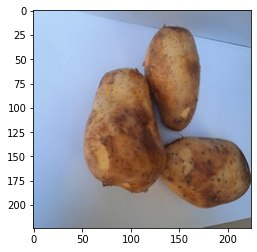

In [3]:
#/225로 정규화 처리 후 이미지 불러오기
train_datagen = ImageDataGenerator(rescale=1./255) 

#LeNet-5 이미지 사이즈에 맞춰 150*150로 이미지 불러오기
train_datagen_flow = train_datagen.flow_from_directory(BASE_DIR + 'train', target_size=(224,224), seed=42, class_mode='categorical') 

x_train, y_train = train_datagen_flow.next()

print(x_train[0].shape)
plt.imshow(x_train[0])
plt.show()

In [4]:
class_map = dict([(v,k) for k,v in train_datagen_flow.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Found 3000 images belonging to 15 classes.
(224, 224, 3)


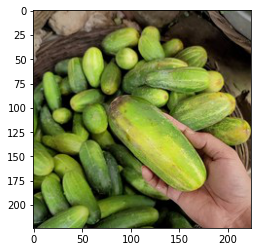

In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + 'validation', target_size=(224,224),seed=42, class_mode='categorical')

x_valid,y_valid = valid_datagen_flow.next()

print(x_valid[0].shape)
plt.imshow(x_valid[0])
plt.show()

Found 3000 images belonging to 15 classes.
(224, 224, 3)


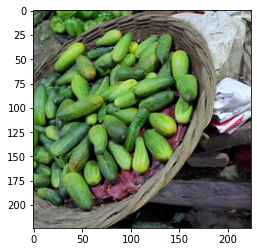

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen_flow = test_datagen.flow_from_directory(BASE_DIR + 'test', target_size=(224,224),seed=42, class_mode='categorical')

x_test,y_test = test_datagen_flow.next()

print(x_test[0].shape)
plt.imshow(x_test[0])
plt.show()

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (32, 224, 224, 3)
32 train samples
32 test samples
(224, 224, 3) image shape


In [8]:
call_back = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
input_shape = x_train[0].shape

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    keras.layers.Flatten(),
    
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='softmax')

])

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 96)      2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 96)      384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 96)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 256)     614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 110, 110, 256)     1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 384)       8

In [13]:
history = model.fit(x_train, y=y_train, 
          epochs=50, 
          batch_size = 32,
          validation_data=(x_valid, y_valid), 
            callbacks = call_back,
          verbose=1)

Epoch 1/50
1/1 [==============================] - 70s 70s/step - loss: 4.9203 - accuracy: 0.0938 - val_loss: 13.8704 - val_accuracy: 0.0938
Epoch 2/50
1/1 [==============================] - 85s 85s/step - loss: 208.1123 - accuracy: 0.1562 - val_loss: 89.0807 - val_accuracy: 0.0312
Epoch 3/50
1/1 [==============================] - 59s 59s/step - loss: 302.2215 - accuracy: 0.3750 - val_loss: 136.0252 - val_accuracy: 0.0938
Epoch 4/50
1/1 [==============================] - 52s 52s/step - loss: 362.4473 - accuracy: 0.4062 - val_loss: 82.1523 - val_accuracy: 0.0938
Epoch 5/50
1/1 [==============================] - 66s 66s/step - loss: 157.3303 - accuracy: 0.5000 - val_loss: 58.2542 - val_accuracy: 0.1250
Epoch 6/50
1/1 [==============================] - 58s 58s/step - loss: 140.1363 - accuracy: 0.4375 - val_loss: 49.0323 - val_accuracy: 0.0625
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [14]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

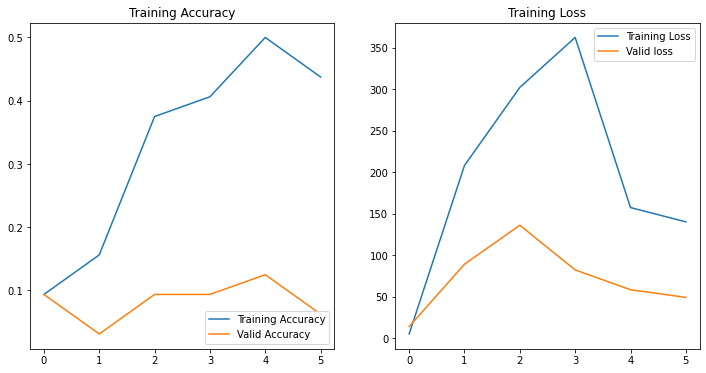

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Valid Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Valid loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [16]:
test_score = model.evaluate(x_test,y_test)

1/1 [==============================] - 19s 19s/step - loss: 2.8366 - accuracy: 0.0312


In [17]:
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

Test loss 2.8366, accuracy 3.12%
